# Data Analysis

## Import packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [10]:
df = pd.read_csv('C:\\Users\\Rendszergazda\\Documents\\GitHub\\recommander\\data\\ratings.dat.txt',sep='::',names=['user_id', 'movie_id', 'rating', 'rating_timestamp'],dtype={'user_id':'Int64', 'movie_id':'str', 'rating':'Int64', 'rating_timestamp':'Int64'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [11]:
df.head()

,user_id,movie_id,rating,rating_timestamp
0,1,0114508,8,1381006850
1,2,0499549,9,1376753198
2,2,1305591,8,1376742507
3,2,1428538,1,1371307089
4,3,0075314,1,1595468524


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897121 entries, 0 to 897120
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           897121 non-null  Int64 
 1   movie_id          897121 non-null  object
 2   rating            897121 non-null  Int64 
 3   rating_timestamp  897121 non-null  Int64 
dtypes: Int64(3), object(1)
memory usage: 29.9+ MB


In [13]:
df.describe()

,user_id,rating,rating_timestamp
count,897121.000000,897121.000000,8.971210e+05
mean,35249.131182,7.316618,1.460784e+09
std,20322.352231,1.852897,7.031571e+07
min,1.000000,0.000000,1.362062e+09
25%,17962.000000,6.000000,1.396643e+09
50%,35118.000000,8.000000,1.451202e+09
75%,52464.000000,9.000000,1.515866e+09
max,70112.000000,10.000000,1.616195e+09


## Transform data

Unix ts to datetime

In [20]:
df['rating_dt'] = pd.to_datetime(df['rating_timestamp'], unit='s')

In [22]:
df.head()

,user_id,movie_id,rating,rating_timestamp,rating_dt
0,1,0114508,8,1381006850,2013-10-05 21:00:50
1,2,0499549,9,1376753198,2013-08-17 15:26:38
2,2,1305591,8,1376742507,2013-08-17 12:28:27
3,2,1428538,1,1371307089,2013-06-15 14:38:09
4,3,0075314,1,1595468524,2020-07-23 01:42:04


In [21]:
df['rating_dt'].describe()

count                  897121
unique                 884326
top       2017-01-19 12:11:16
freq                       38
first     2013-02-28 14:38:27
last      2021-03-19 23:09:31
Name: rating_dt, dtype: object

Extract year

In [29]:
df['rating_year'] = df['rating_dt'].dt.year

In [30]:
df.head()

,user_id,movie_id,rating,rating_timestamp,rating_dt,rating_year
0,1,0114508,8,1381006850,2013-10-05 21:00:50,2013
1,2,0499549,9,1376753198,2013-08-17 15:26:38,2013
2,2,1305591,8,1376742507,2013-08-17 12:28:27,2013
3,2,1428538,1,1371307089,2013-06-15 14:38:09,2013
4,3,0075314,1,1595468524,2020-07-23 01:42:04,2020


## EDA

### Distinct nbr of users and movies

In [14]:
df.nunique()

user_id              70112
movie_id             36910
rating                  11
rating_timestamp    884326
dtype: int64

### Nbr of data points per year

In [34]:
df.groupby('rating_year').count()['rating']

rating_year
2013    170807
2014    156354
2015    123644
2016    112455
2017    105987
2018     81870
2019     74183
2020     63147
2021      8674
Name: rating, dtype: int64

Text(0.5, 1.0, 'Nbr of ratings per year')

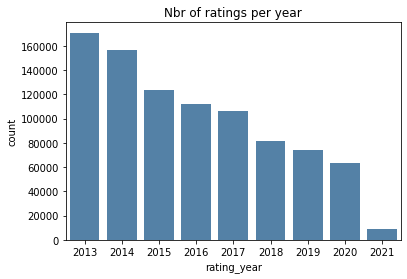

In [45]:
sns.countplot(x='rating_year',data=df, color='steelblue').set_title('Nbr of ratings per year')

### Popular movies

In [55]:
df_movie_aggr = df.groupby('movie_id').agg(avg_rating=('rating', 'mean'), rating_cnt=('rating', 'count'))

In [82]:
df_movie_aggr.describe(percentiles=np.arange(0,1,0.1))

,avg_rating,rating_cnt
count,36910.000000,36910.000000
mean,6.668085,24.305635
std,1.812900,113.780433
min,0.000000,1.000000
0%,0.000000,1.000000
10%,4.024224,1.000000
20%,5.400000,1.000000
30%,6.000000,1.000000
40%,6.500000,1.000000
50%,7.000000,2.000000


In [81]:
df_movie_aggr.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.95,0.96,0.97,0.98,0.99])

,avg_rating,rating_cnt
count,36910.000000,36910.000000
mean,6.668085,24.305635
std,1.812900,113.780433
min,0.000000,1.000000
1%,1.000000,1.000000
2%,2.000000,1.000000
3%,2.000000,1.000000
4%,3.000000,1.000000
5%,3.000000,1.000000
50%,7.000000,2.000000


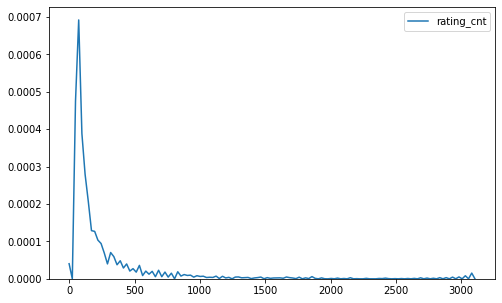

In [73]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df_movie_aggr['rating_cnt'])

Maybe TOP 1% (~500+ ratings) can be considered popular or movies having 1000+ ratings

### Long-tail movies

Movies having 10 or less ratings

In [84]:
df_movie_aggr['rating_cnt'].describe(percentiles=np.arange(0,1,0.05))

count    36910.000000
mean        24.305635
std        113.780433
min          1.000000
0%           1.000000
5%           1.000000
10%          1.000000
15%          1.000000
20%          1.000000
25%          1.000000
30%          1.000000
35%          1.000000
40%          1.000000
45%          2.000000
50%          2.000000
55%          2.000000
60%          3.000000
65%          4.000000
70%          5.000000
75%          7.000000
80%         11.000000
85%         18.000000
90%         35.000000
95%         91.000000
max       3103.000000
Name: rating_cnt, dtype: float64

About 80% of movies have 10 or less ratings

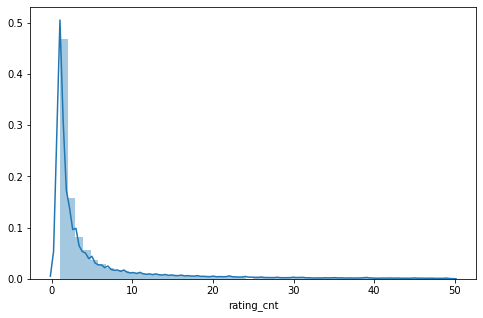

In [92]:
plt.figure(figsize=(8,5))
sns.distplot(a=df_movie_aggr[df_movie_aggr['rating_cnt']<50]['rating_cnt'])

### Ratings per user

In [93]:
df_user_aggr = df.groupby('user_id').agg(avg_rating=('rating', 'mean'), rating_cnt=('rating', 'count'))

In [94]:
df_user_aggr.describe()

,avg_rating,rating_cnt
count,70112.000000,70112.000000
mean,7.903885,12.795541
std,1.711119,45.658428
min,0.000000,1.000000
25%,7.000000,1.000000
50%,8.000000,2.000000
75%,9.000000,7.000000
max,10.000000,2875.000000


Users in average have rated about 13 movies

### Baseline for a model predicting only top movies

**Model Error:** % of cases when a user watched only movies below TOP category (< 500 ratings)

In [106]:
# List of TOP 1% movies
top_1pct_movie_list = df_movie_aggr[df_movie_aggr['rating_cnt'] > 500].index.values

# % Users with no TOP movie rated
1-df[df['movie_id'].isin(top_1pct_movie_list)]['user_id'].nunique()/df['user_id'].nunique()

0.30474098585120946

Using only TOP movies there is no chance to give relevant recommendation for 30% of base who are interested only in niche movies.